<a href="https://colab.research.google.com/github/suryakovvada/artificial_neural_network/blob/main/copy_of_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Install Libraries
!pip install numpy pandas scikit-learn matplotlib

In [2]:
# Cell 2: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
import numpy as np

class NeuralNetwork:
    """
    A simple Artificial Neural Network to predict concrete mix proportions given compressive strength.
    """
    def __init__(self, input_size=1, hidden_size=4, output_size=4, learning_rate=0.02):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_ih = np.random.uniform(-1, 1, (hidden_size, input_size))
        self.bias_h = np.random.uniform(-1, 1, hidden_size)
        self.weights_ho = np.random.uniform(-1, 1, hidden_size)
        self.bias_o = np.random.uniform(-1, 1, output_size)
        self.training_errors = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        hidden_input = np.dot(self.weights_ih, inputs) + self.bias_h
        hidden_output = self.sigmoid(hidden_input)
        output_input = np.dot(self.weights_ho, hidden_output) + self.bias_o
        output_output = self.sigmoid(output_input)
        return hidden_output, output_output

    def backward(self, inputs, desired_output, hidden_output, output_output):
        output_error = desired_output - output_output
        output_delta = output_error * self.sigmoid_derivative(output_output)

        hidden_error = np.dot(self.weights_ho.T, output_delta)
        hidden_delta = hidden_error * self.sigmoid_derivative(hidden_output)

        self.weights_ho += self.learning_rate * np.outer(output_delta, hidden_output)
        self.bias_o += self.learning_rate * output_delta

        self.weights_ih += self.learning_rate * np.outer(hidden_delta, inputs)
        self.bias_h += self.learning_rate * hidden_delta

    def train(self, training_data, desired_outputs, iterations=12040):
        for i in range(iterations):
            total_error = 0
            for inputs, desired_output in zip(training_data, desired_outputs):
                hidden_output, output_output = self.forward(inputs)
                self.backward(inputs, desired_output, hidden_output, output_output)
                total_error += np.mean((desired_output - output_output) ** 2)

            avg_error = total_error / len(training_data)
            self.training_errors.append(avg_error)
            if i % 1000 == 0:
                print(f"Iteration {i}, Error: {avg_error:.4f}")

    def predict(self, inputs):
        predictions = []
        for input_sample in inputs:
            _, output_output = self.forward(input_sample)
            predictions.append(output_output)
        return np.array(predictions)


In [5]:
from google.colab import files
import io
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Upload the Excel file
uploaded = files.upload()
excel_file = next(iter(uploaded))

df = pd.read_excel(excel_file)

# Selecting only the target variable (Compressive Strength) as input
X = df[['28D(mpa)']].values  # Input: Compressive Strength
y_columns = ['W/C RATIO ', 'CEMENT CONTENT©(kg/m^3)', 'FLY ASH CONTENT(FA)kg/m^3', 'MIX PRAPOTIONS((C : FA : sand : CA))']

# Check if all columns exist before proceeding
for col in y_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the Excel file. Please check the spelling and case.")

y = df[y_columns].copy()

def extract_proportions(mix_str):
    try:
        parts = mix_str.split(':')
        return list(map(float, parts))
    except:
        return [np.nan, np.nan, np.nan, np.nan]  # Return 4 NaNs

proportions = y['MIX PRAPOTIONS((C : FA : sand : CA))'].apply(extract_proportions)
y[['Cement_Prop', 'FA_Prop', 'Sand_Prop', 'CA_Prop']] = pd.DataFrame(proportions.tolist(), index=y.index)
y.drop('MIX PRAPOTIONS((C : FA : sand : CA))', axis=1, inplace=True)
y.fillna(y.mean(), inplace=True)

y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_scaler = MinMaxScaler()
X_train_scaled = input_scaler.fit_transform(X_train)
X_test_scaled = input_scaler.transform(X_test)

output_scaler = MinMaxScaler()
y_train_scaled = output_scaler.fit_transform(y_train)
y_test_scaled = output_scaler.transform(y_test)


Saving FINAL PROJECT EXCEL.xlsx to FINAL PROJECT EXCEL.xlsx


In [11]:
# Model Initialization and Training
input_size = 1  # One input neuron (Compressive Strength)
hidden_size = 4  # One hidden layer with 4 neurons
output_size = y_train_scaled.shape[1]  # Output neurons (Concrete mix proportions)

nn = NeuralNetwork(input_size, hidden_size, output_size)


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model Evaluation
y_train_pred_scaled = nn.predict(X_train_scaled)
y_test_pred_scaled = nn.predict(X_test_scaled)

y_train_pred = output_scaler.inverse_transform(y_train_pred_scaled)
y_test_pred = output_scaler.inverse_transform(y_test_pred_scaled)

# Calculate Performance Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("--- Training Performance ---")
print(f"Train Mean Squared Error: {train_mse:.2f}")
print(f"Train Root Mean Squared Error: {train_rmse:.2f}")
print(f"Train R-squared: {train_r2:.4f}")

print("\n--- Testing Performance ---")
print(f"Test Mean Squared Error: {test_mse:.2f}")
print(f"Test Root Mean Squared Error: {test_rmse:.2f}")
print(f"Test R-squared: {test_r2:.4f}")

--- Training Performance ---
Train Mean Squared Error: 536.50
Train Root Mean Squared Error: 23.16
Train R-squared: -84431522762741633484800917504.0000

--- Testing Performance ---
Test Mean Squared Error: 461.59
Test Root Mean Squared Error: 21.48
Test R-squared: -4129086737750886163317899919360.0000


In [4]:
# Cell 4: Plotting Functions
def plot_loss_curve(training_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(training_errors)
    plt.title('Training Loss Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

def plot_actual_vs_predicted(y_actual, y_predicted, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'k--', lw=2)  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_residuals(y_actual, y_predicted, title):
    residuals = (y_actual - y_predicted)/y_actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_predicted, residuals)
    plt.axhline(y=0, color='k', linestyle='--', lw=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual - Predicted)/actual')
    plt.title(title)
    plt.grid(True)
    plt.show()

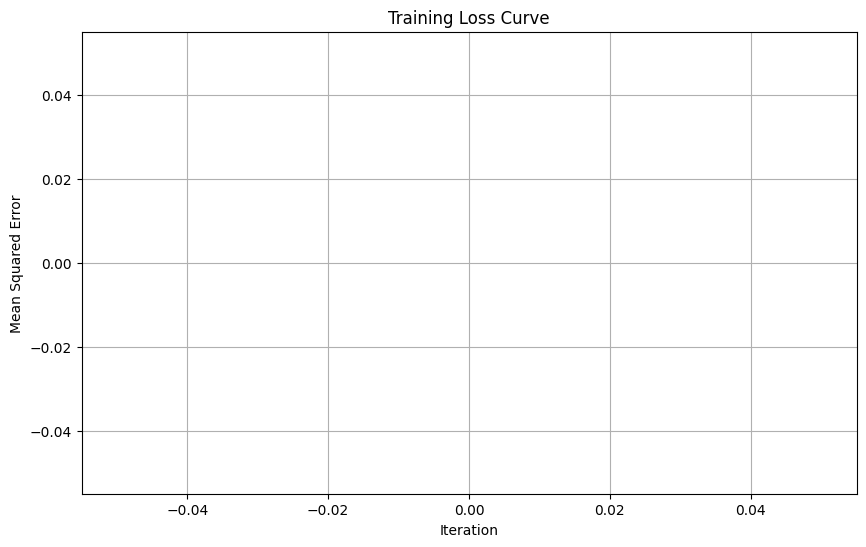

<ipython-input-4-61a51ab64701>:22: RuntimeWarning: divide by zero encountered in divide
  residuals = (y_actual - y_predicted)/y_actual


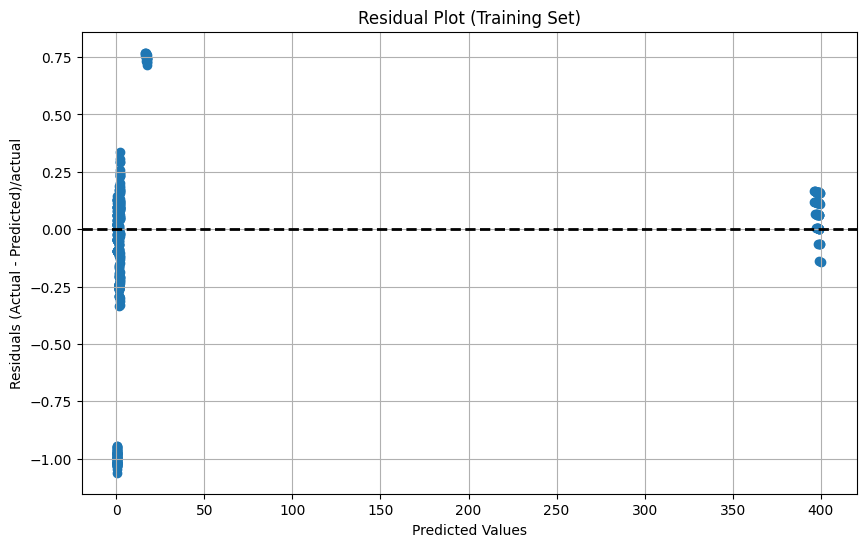

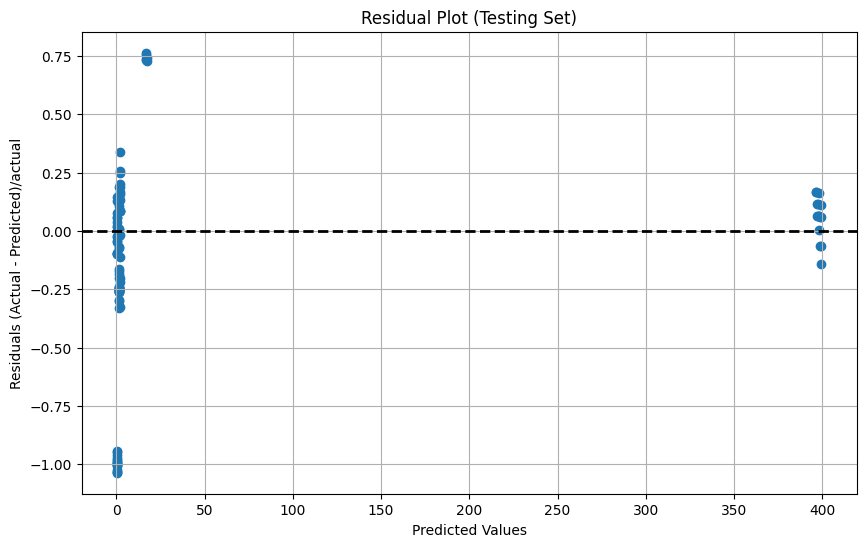

In [17]:
# Cell 8: Plotting Results
plot_loss_curve(nn.training_errors)
plot_residuals(y_train, y_train_pred, 'Residual Plot (Training Set)')
plot_residuals(y_test, y_test_pred, 'Residual Plot (Testing Set)')

In [26]:
# Cell 9: Prediction on New Data

# Input: Compressive strength (MPa)
new_strength = np.array([[40]])  # Example compressive strength value
# Use input_scaler instead of output_scaler
new_strength_scaled = input_scaler.transform(new_strength.reshape(-1, 1))

# Predict mix proportions
predicted_proportions_scaled = nn.predict(new_strength_scaled)
predicted_proportions = output_scaler.inverse_transform(predicted_proportions_scaled.reshape(1, -1))

# Print results
print("\nPredicted mix proportions for given compressive strength:")
print(f"Cement: {predicted_proportions[0][0]:.2f}, FA: {predicted_proportions[0][1]:.2f}, Sand: {predicted_proportions[0][2]:.2f}, CA: {predicted_proportions[0][3]:.2f}")


Predicted mix proportions for given compressive strength:
Cement: 0.46, FA: 398.96, Sand: 17.12, CA: 1.26


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Step 1: Upload the Excel file
uploaded = files.upload()
excel_file = next(iter(uploaded))

# Step 2: Load the Excel file
data = pd.read_excel(excel_file)

# Step 3: Define the columns for actual and predicted values
actual_column = 'Actual'  # Replace with the correct column name from your data
predicted_column = 'Predicted'  # Replace with the correct column name from your data

# Ensure the columns exist
if actual_column not in data.columns or predicted_column not in data.columns:
    raise ValueError(f"Ensure the Excel file has columns '{actual_column}' and '{predicted_column}'.")

# Step 4: Extract actual and predicted values
actual_values = data[actual_column].values
predicted_values = data[predicted_column].values

# Step 5: Calculate the errors
errors = (actual_values - predicted_values)/actual_values  # Difference between actual and predicted
absolute_errors = abs(errors)  # Absolute errors
squared_errors = errors ** 2  # Squared errors

# Add a new column for errors in the DataFrame (optional)
data['Errors'] = errors
data['Absolute Errors'] = absolute_errors
data['Squared Errors'] = squared_errors

# Display the first few rows of the updated DataFrame with errors
print("Data with Errors:")
print(data.head())

# Step 6: Create the scatter plot with error bars
plt.figure(figsize=(5, 5))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.7, label='Data Points')

# Add error bars to show the respective errors
plt.errorbar(
    actual_values, predicted_values,
    yerr=absolute_errors,  # Use the absolute errors for the error bars
    fmt='o', color='blue', ecolor='orange', elinewidth=1.5, alpha=0.6, label='Error Bars'
)

# Plot the ideal fit line
min_value = min(min(actual_values), min(predicted_values))
max_value = max(max(actual_values), max(predicted_values))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Ideal Fit')

# Set plot labels and title
plt.title('Actual vs Predicted Values with Error Bars')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the scatter plot
plt.show()

# Step 7: Calculate error metrics
mae = absolute_errors.mean()
mse = squared_errors.mean()
rmse = np.sqrt(mse)

# Display the summary statistics for errors
print("\nSummary of Errors:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
